In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math
from scipy import constants

# Cooling Power #

$\dot{Q} = hA(T_2 - T_1)$

Where $\dot{Q}$ is cooling power in Watts ($\frac{joules}{second}$), h is thermal transfer coefficient, A is area of heat transfer, $T_2$ is the temperature of the Xenon, and $T_1$ is the temperature of the nitrogen.

Given the temperature boundary conditions, dimensions of the evaporator and condenser, and the materials (namely, coppper), we can deduce this cooling power. From the cooling power, we can derive a necessary flowrate of liquid nitrogen into the system, which allows us to know our usage of the dewar, as well as calculate to gas flow rate out of the system.

# Flow Rate Stoichiometry #

$\left(\frac{Joule}{Second}\right)\left(\frac{mol}{joule}\right)\left(\frac{gram}{mol}\right)\left(\frac{liter}{gram}\right) = \left(\frac{liter}{second}\right)$

$\left(Cooling Power\right)\div\left(Latent Heat of Vaporization\right)\left(Molar Mass\right)\div\left(Density\right) = \left(Flow Rate\right)$

Flow Rate $ = \frac{\dot{Q}M}{\rho L}$

In the equilibrium (ideal) state, we can approximate the thermal transfer coefficient as the one which is entirely due to the copper between the nitrogen and xenon. To obtain this value, we use the specifications from McMaster for 101 Copper. 

Here: (From McMaster-Carr)

Super-Conductive 101 Copper Thermal Conductivity: 226 Btu/hr. × ft./°F @ 68° F =  391.146 Watt/m/K

The thermal transfer coefficient depends upon length of the connection:

$ h = \frac{U}{s}$ where U is the thermal conductivity and s is the connection length, which is 2 inches in this system.






In [4]:
thermal_area = 0.000903224 #1.4 square inches in m^2
conductivity_cu = 391.146
length_s = 0.0508 #2 inches in m
h_cu = conductivity_cu/length_s
T_ln2 = 77
T_xe = 165
density_ln2 = 816.7 #grams per liter
density_n2 = 1.126
latent_vap_n2 = 5600 #joules per mole
molar_mass_n2 = 28 #grams per mol

In [5]:
cooling_power = h_cu*thermal_area*(T_xe - T_ln2)
flow_rate_s = (cooling_power*molar_mass_n2)/(density_ln2*latent_vap_n2)
flow_rate_s_g = (cooling_power*molar_mass_n2)/(density_n2*latent_vap_n2)
flow_rate_m_g = flow_rate_s_g*60
flow_rate_m = flow_rate_s*60
flow_rate_m_inv = 1/flow_rate_m
flow_rate_m_g_inv = 1/flow_rate_m_g

In [7]:
print("Cooling Power: " + str(cooling_power) + " Watts")
print("Flow Rate (Liquid): " + str(flow_rate_s) + " Liters per second")
print("Flow Rate (Liquid): " + str(flow_rate_m) + " Liters per minute")
print("Flow Rate (Liquid): " + str(flow_rate_m_inv) + " Minutes per liter")
print("Flow Rate (Gas): " + str(flow_rate_s_g) + " Liters per second")
print("Flow Rate (Gas): " + str(flow_rate_m_g) + " Liters per minute")
print("Flow Rate (Gas): " + str(flow_rate_m_g_inv) + " Minutes per liter")

Cooling Power: 612.0026774400001 Watts
Flow Rate (Liquid): 0.0037468022372964373 Liters per second
Flow Rate (Liquid): 0.22480813423778623 Liters per minute
Flow Rate (Liquid): 4.448237620006536 Minutes per liter
Flow Rate (Gas): 2.717596258614565 Liters per second
Flow Rate (Gas): 163.05577551687392 Liters per minute
Flow Rate (Gas): 0.006132870772777468 Minutes per liter


In [9]:
for i in range(3):
    print(i)

0
1
2


In [44]:
n_list = []
ratio_list = []
print("n    f(n)")
for i in range(130):
    i += 1
    temp_str_u = ""
    temp_str_d = ""
    for j in range(i):
        temp_str_u = temp_str_u + (str(j+1))
        temp_str_d = temp_str_d + (str(i-j))
    ratio = int(temp_str_d)/float(temp_str_u)
    print(str(ratio))
    n_list.append(i)
    ratio_list.append(ratio)


n    f(n)
1.0
1.75
2.6097560975609757
3.5016207455429496
4.400243013365735
5.300034020217729
6.200004536003311
7.100000583200048
8.0000000729
0.8900000073791
0.8999000074521629
0.9809990081236458
1.0628099988011208
1.144628109378656
1.2264462911551917
1.3082644736437175
1.3900826561393629
1.4719008386350796
1.5537190211307972
1.6355372036265148
1.7173553861222322
1.7991735686179497
1.8809917511136671
1.9628099336093845
2.0446281161051023
2.1264462986008197
2.2082644810965375
2.290082663592255
2.3719008460879727
2.45371902858369
2.535537211079407
2.617355393575125
2.6991735760708426
2.7809917585665596
2.8628099410622774
2.9446281235579947
3.0264463060537126
3.10826448854943
3.1900826710451473
3.271900853540865
3.3537190360365825
3.4355372185323
3.5173554010280172
3.5991735835237346
3.6809917660194524
3.76280994851517
3.8446281310108876
3.926446313506605
4.008264496002322
4.09008267849804
4.171900860993757
4.2537190434894745
4.335537225985193
4.41735540848091
4.4991735909766275
4.5809917

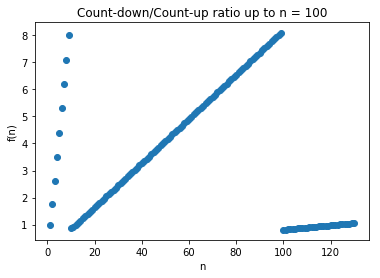

In [43]:
plt.scatter(n_list,ratio_list)
plt.title("Count-down/Count-up ratio up to n = 100")
plt.xlabel("n")
plt.ylabel("f(n)")
plt.show()

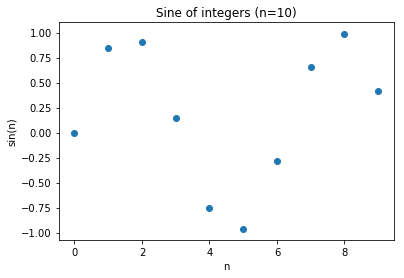

In [71]:
n = 10
n_list = []
for i in range(n):
    n_list.append(i)
sin_n_list = []
for n_item in n_list:
    sin_n_list.append(math.sin(n_item))
plt.scatter(n_list,sin_n_list)
plt.title("Sine of integers (n=%d)"%(n))
plt.xlabel("n")
plt.ylabel("sin(n)")
plt.show()

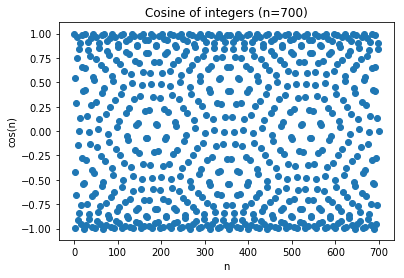

In [116]:
n = 700
n_list = []
for i in range(n):
    n_list.append(i)
cos_n_list = []
for n_item in n_list:
    cos_n_list.append(math.cos(n_item))
plt.scatter(n_list,cos_n_list)
plt.title("Cosine of integers (n=%d)"%(n))
plt.xlabel("n")
plt.ylabel("cos(n)")
plt.show()